In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv("movie.csv")
df.head()

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


##  #1 Data Types and Summary

In [3]:
df.columns

Index(['Genre', 'Rotten Tomatoes', 'IMDB', 'Audience Ratings', 'Budget_M',
       'Sales Revenue_M', 'Year of Release'],
      dtype='object')

In [4]:
### size of the dataset
size=df.shape
print("size of the dataset", size)

size of the dataset (101, 7)


In [5]:
df.dtypes

Genre                object
Rotten Tomatoes       int64
IMDB                float64
Audience Ratings      int64
Budget_M            float64
Sales Revenue_M     float64
Year of Release      object
dtype: object

For the Genre and Year of Release variables they are object type of data which can hold any data type or a combination of data type. For the Rotten Tomatoes and Audience Ratings they are an int64 data type which is a 64 bit integer data type that stores whole numbers without decimal points. For the IMDB, Budget_M, and Sales Revenue_M, they are float64 data type which is used to store decimal numbers with high precision

## #2 Descriptive Statistics

In [6]:
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


## #3Discriptive Analysis

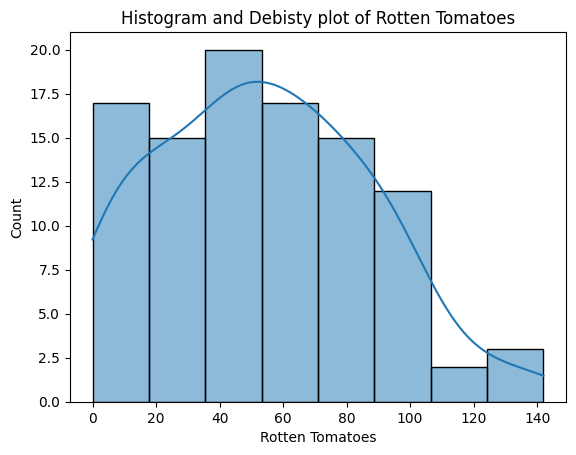

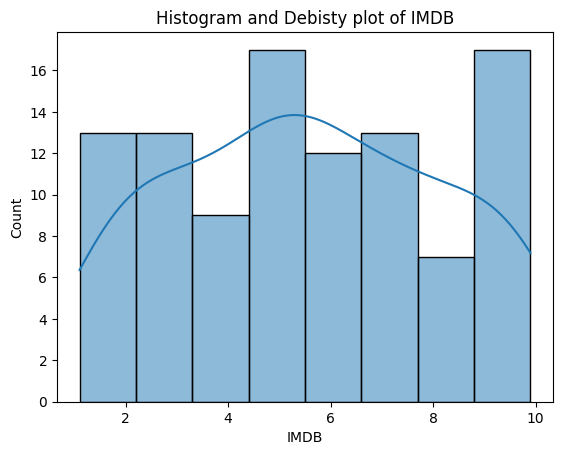

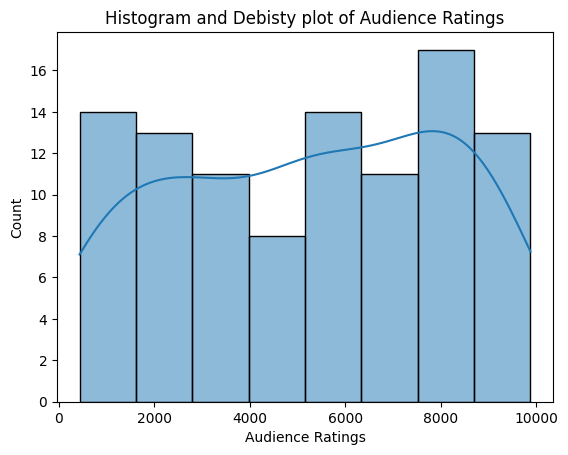

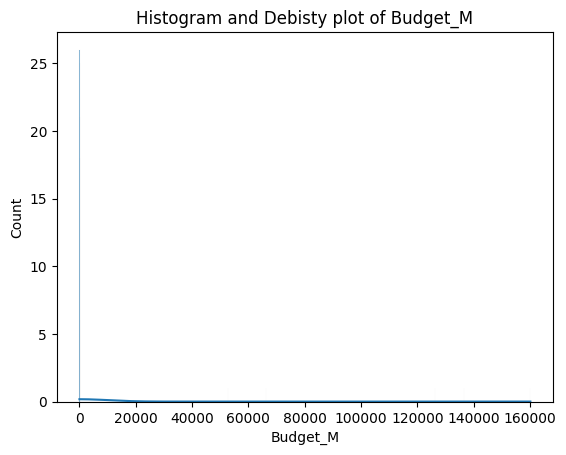

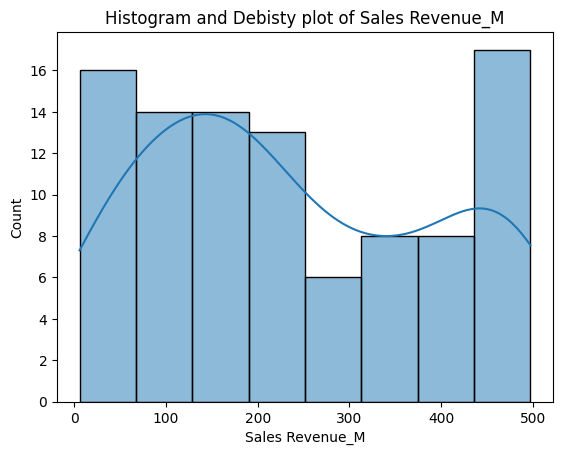

In [7]:
#### Histograms and Density Plots for numerical Variables

for col in df.select_dtypes(include=['number']).columns:
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Debisty plot of {col}")
  plt.show()

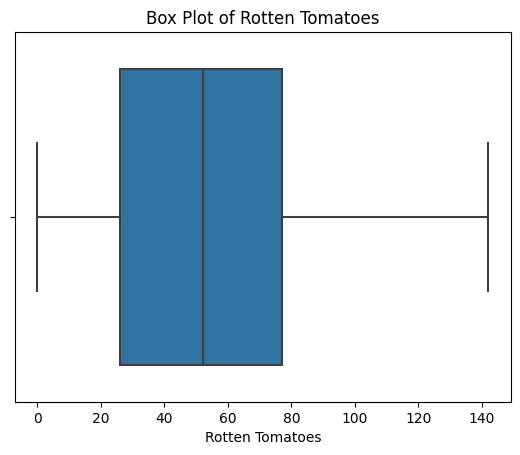

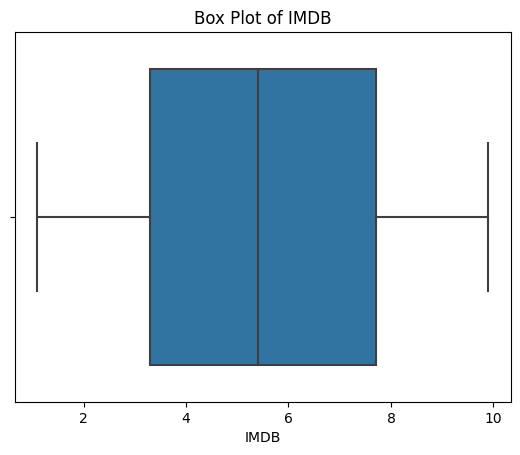

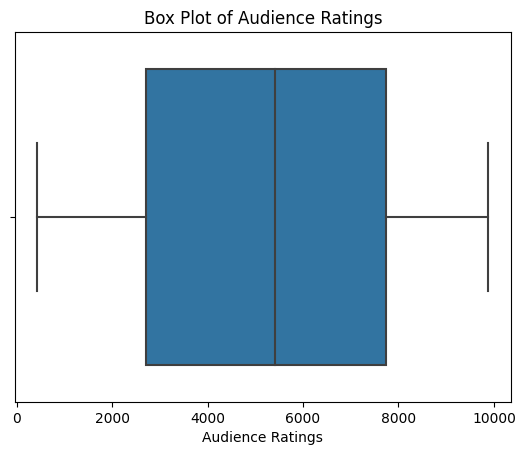

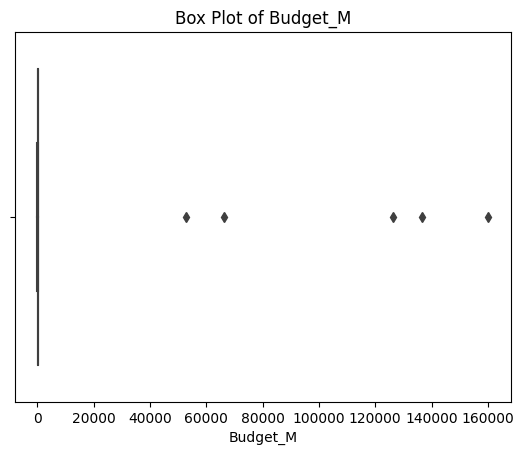

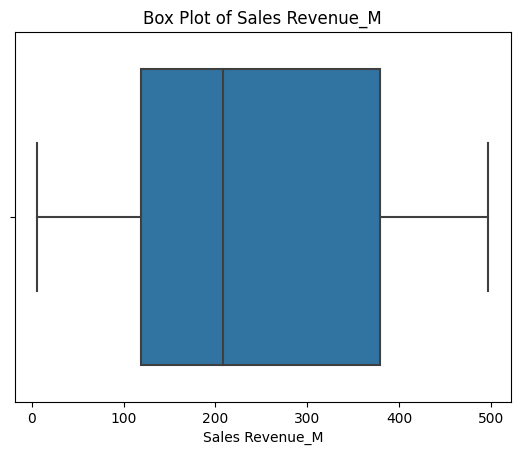

In [8]:
for col in df.select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show()

## #4 Variability Analysis 

In [9]:
var = df.describe()
print(var.loc['std'])

Rotten Tomatoes        33.764323
IMDB                    2.608864
Audience Ratings     2891.578546
Budget_M            25371.661518
Sales Revenue_M       156.248835
Name: std, dtype: float64


From the results we see that the Budget_M has the highest variability.

## #5 Correlation Analysis

In [10]:
correlation_matrix=df.corr()
correlation_matrix

/tmp/ipykernel_600/2576092325.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
Rotten Tomatoes,1.000000,-0.010546,-0.126204,-0.051246,-0.122929
IMDB,-0.010546,1.000000,0.126555,-0.053704,-0.041741
Audience Ratings,-0.126204,0.126555,1.000000,-0.111453,-0.011118
Budget_M,-0.051246,-0.053704,-0.111453,1.000000,0.030309
Sales Revenue_M,-0.122929,-0.041741,-0.011118,0.030309,1.000000


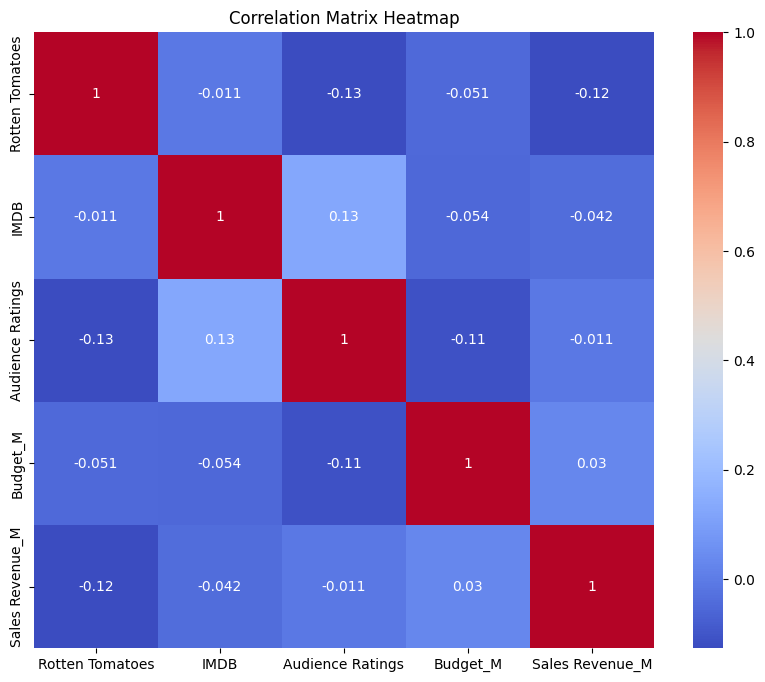

In [11]:
plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

It shows that Budget_M has the highest correlationg with Sales Revenue so a higher budget is correlated with a higher sales revenue. The Audience rating also has a strong correlation with Sales Revenue with a value of -0.012

## #6 Average Profit by Genre

In [12]:
column_name = 'Sales Revenue_M'
highest_value = df['Sales Revenue_M' ].max()
print(f"The highest value in {column_name} is: {highest_value}")

The highest value in Sales Revenue_M is: 497.2003948


In [13]:
max_index = df[column_name].idxmax()
genre= df.at[max_index, 'Genre']
print(f"The highest value in {column_name} is in the genre: {genre}")

The highest value in Sales Revenue_M is in the genre: Thriller


## #7 Marketing Spend Analysis

Looking at the correlation matrix heatmap, there is a correlation coefficient between Budget and Sales Revenue of 0.03 which is positive but the value is very small which means there is a small positive correlation between Sales Revenue and Budget, but there is a correlation.

## #8 Pairwise Comparison

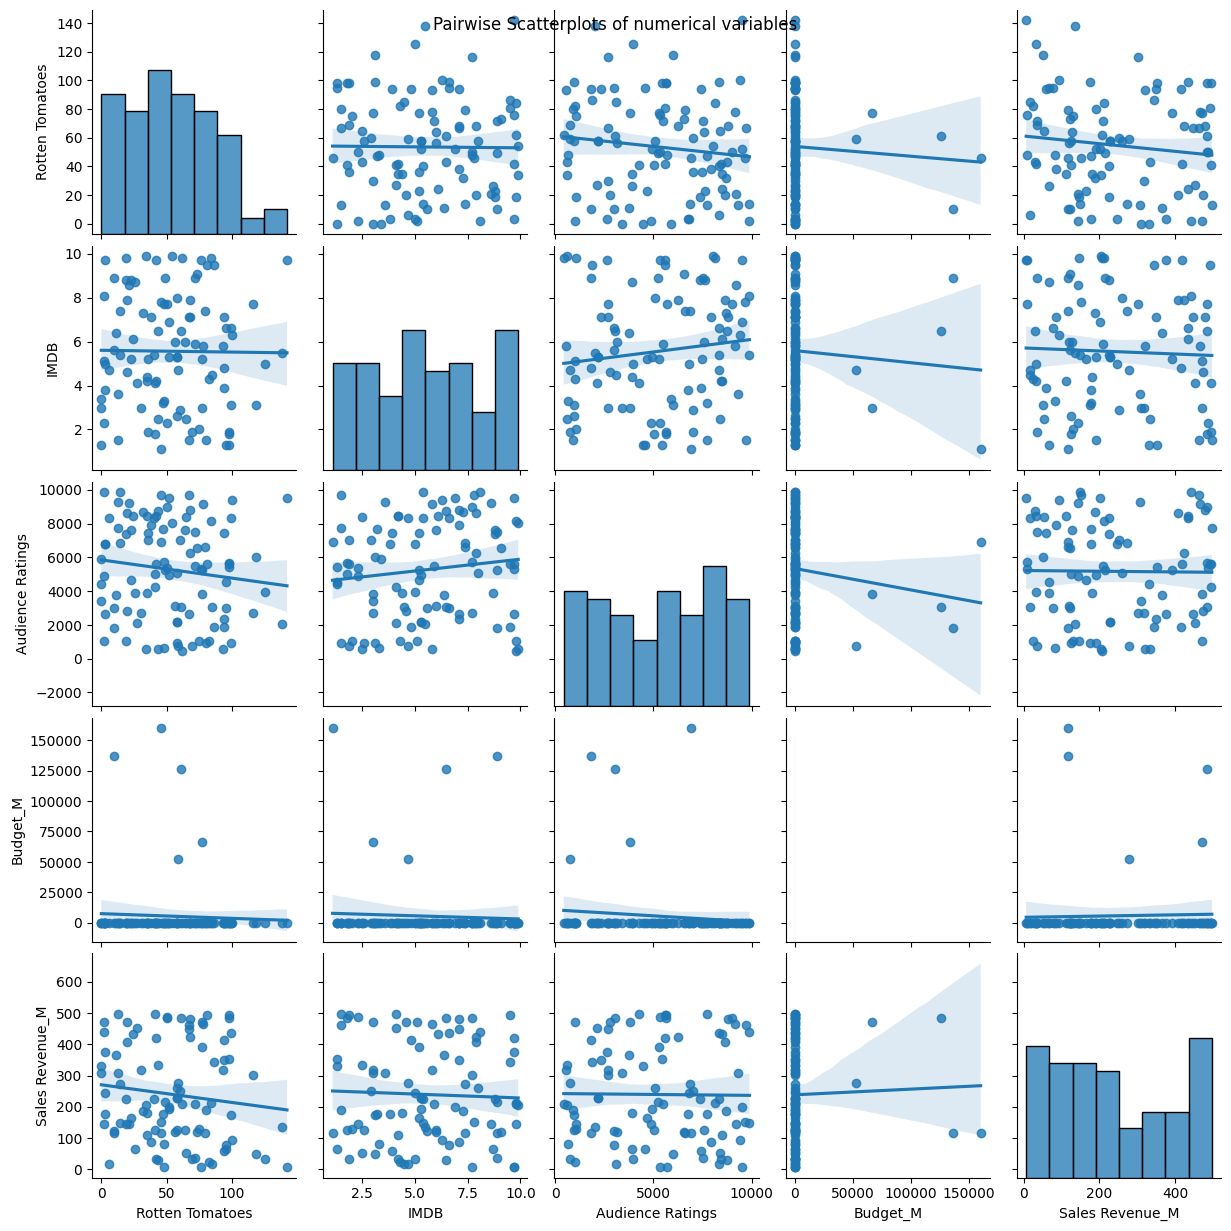

In [14]:
sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle("Pairwise Scatterplots of numerical variables")
plt.show()

## #9 Missing Values Investigation

In [15]:
missing=df.isnull().sum()

In [16]:
print(missing)

Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64


In [17]:
df = df.fillna(df['Sales Revenue_M'].mean())

In [18]:
print(missing)

Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64


## #10 Noisy Data Analysis

In [19]:
df.isnull().sum()

Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
Year of Release     0
dtype: int64

In [20]:
for col in df.select_dtypes(include='object').columns:
  print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Genre:
Action         16
Romance        15
Thriller       15
Comedy         15
Horror         10
Drama           9
Documentary     9
Sci-Fi          7
SciFi           5
Name: Genre, dtype: int64

Value counts for Year of Release:
1992         6
1986         5
1998         5
2013         4
2018         4
1985         4
1990         3
1980         3
1999         3
1995         3
2010         3
2009         3
2005         3
2006         3
2012         3
2019         3
2017         3
1981         2
2021         2
2016         2
2023         2
2020         2
1983         2
2001         2
2004         2
1988         2
2008         2
2000         2
2015         2
Year 2001    1
1993         1
2011         1
1989         1
1996         1
Year 1982    1
2007         1
1991         1
2003         1
1982         1
Year 2023    1
2014         1
Year 2008    1
2022         1
Year 2004    1
2002         1
Name: Year of Release, dtype: int64



In [21]:
print(df['Genre'].unique())

['Horror' 'Romance' 'SciFi' 'Action' 'Thriller' 'Comedy' 'Sci-Fi' 'Drama'
 'Documentary']


In [22]:
df['Genre'] = df['Genre'].replace('SciFi', 'Sci-Fi')


In [23]:
print(df['Genre'].unique())

['Horror' 'Romance' 'Sci-Fi' 'Action' 'Thriller' 'Comedy' 'Drama'
 'Documentary']


In [24]:
print(df['Year of Release'].unique())

['2020' '2013' '2017' '2019' '2012' '2006' '2015' '2005' 'Year 2004'
 '1998' '2000' '2010' '2008' '1988' '2004' '2022' 'Year 2008' '1983'
 '1999' '1980' '1990' '1986' '2007' '2014' '2018' 'Year 2023' '2016'
 '2021' '1982' '1992' '1995' '2003' '1985' '1981' '1991' '2001'
 'Year 1982' '2009' '1989' '2023' 'Year 2001' '1993' '2011' '1996' '2002']


In [25]:
df['Year of Release'] = df['Year of Release'].str.replace('Year', '')


In [26]:
print(df['Year of Release'].unique())


['2020' '2013' '2017' '2019' '2012' '2006' '2015' '2005' ' 2004' '1998'
 '2000' '2010' '2008' '1988' '2004' '2022' ' 2008' '1983' '1999' '1980'
 '1990' '1986' '2007' '2014' '2018' ' 2023' '2016' '2021' '1982' '1992'
 '1995' '2003' '1985' '1981' '1991' '2001' ' 1982' '2009' '1989' '2023'
 ' 2001' '1993' '2011' '1996' '2002']


## #11 Data Duplication

In [27]:
duplicates = df.duplicated().sum()
print("Number of Duplocate Records:", duplicates)

Number of Duplocate Records: 1


In [28]:
df=df.drop_duplicates()

Since it is only 1 duplicate, the impact might not be significant